In [1]:
pip install numpy matplotlib pandas


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


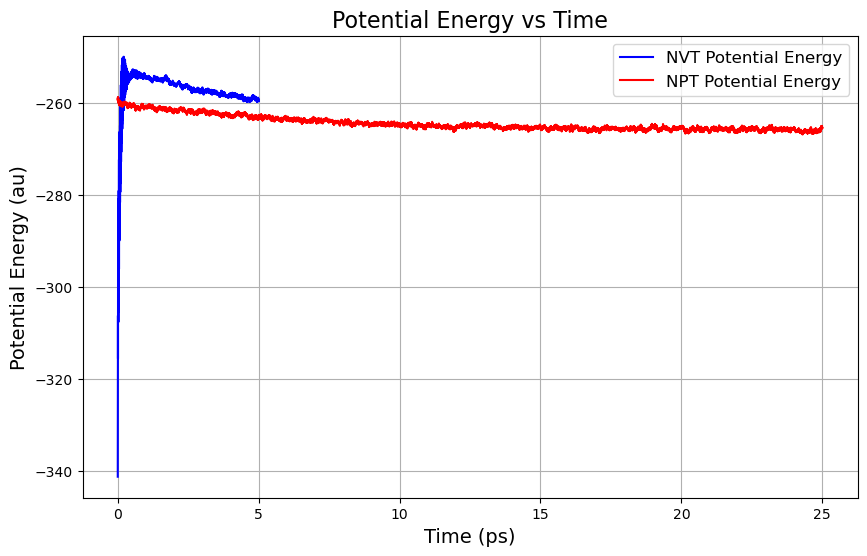

In [6]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Set paths to the energy files
nvt_energy_file = "../Outputs/NVT-1.ener"
npt_energy_file = "../Outputs/NPT-1.ener"

# Define a function to read GROMACS .xvg files
def read_xvg(file_path):
    """Reads a GROMACS .xvg energy file and returns time and potential energy."""
    times = []
    energies = []
    with open(file_path, 'r') as file:
        for line in file:
            # Skip comments and legend lines
            if line.startswith(('#', '@')):
                continue
            # Parse time and energy
            data = line.split()
            times.append(float(data[1])) # in fs
            energies.append(float(data[4]))
    return np.array(times) / 1000, np.array(energies)

# Load energy data
nvt_time, nvt_energy = read_xvg(nvt_energy_file)
npt_time, npt_energy = read_xvg(npt_energy_file)

# Create a plot
plt.figure(figsize=(10, 6))
plt.plot(nvt_time, nvt_energy, label='NVT Potential Energy', color='blue')
plt.plot(npt_time, npt_energy, label='NPT Potential Energy', color='red')

# Add labels, title, and legend
plt.title("Potential Energy vs Time", fontsize=16)
plt.xlabel("Time (ps)", fontsize=14)
plt.ylabel("Potential Energy (au)", fontsize=14)
plt.legend(fontsize=12)
plt.grid()

# Save the figure
plt.savefig("../Figures/energy_vs_time.png", dpi=300)
plt.show()


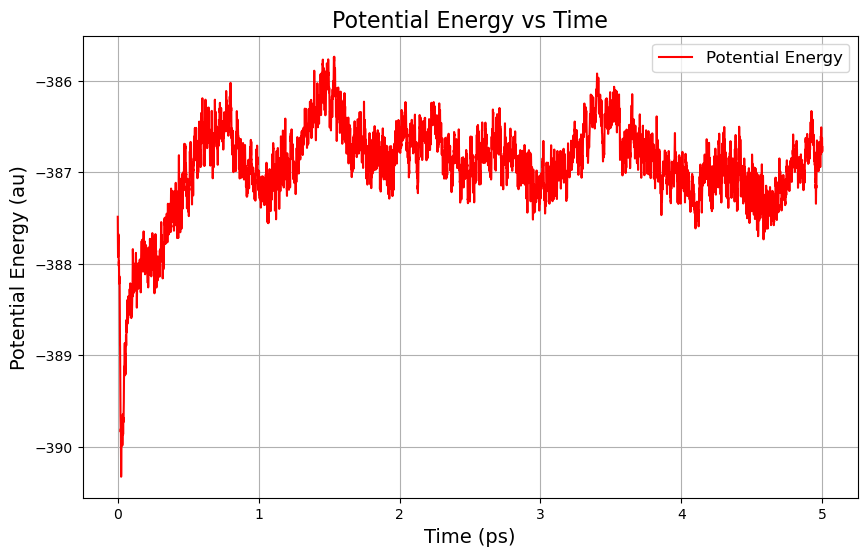

In [9]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Set paths to the energy files
monitor_energy_file = "../Outputs/monitor/MONITOR-1.ener"


# Define a function to read GROMACS .xvg files
def read_xvg(file_path):
    """Reads a GROMACS .xvg energy file and returns time and potential energy."""
    times = []
    energies = []
    with open(file_path, 'r') as file:
        for line in file:
            # Skip comments and legend lines
            if line.startswith(('#', '@')):
                continue
            # Parse time and energy
            data = line.split()
            times.append(float(data[1])) # in fs
            energies.append(float(data[4]))
    return np.array(times) / 1000, np.array(energies)

# Load energy data
time, energy = read_xvg(monitor_energy_file)

# Create a plot
plt.figure(figsize=(10, 6))
plt.plot(time, energy, label='Potential Energy', color='red')

# Add labels, title, and legend
plt.title("Potential Energy vs Time", fontsize=16)
plt.xlabel("Time (ps)", fontsize=14)
plt.ylabel("Potential Energy (au)", fontsize=14)
plt.legend(fontsize=12)
plt.grid()

# Save the figure
plt.savefig("../Figures/qmmm_energy_vs_time.png", dpi=300)
plt.show()
